# <font color='black'>Data Preprocessing Module</font>
______________________________________________________________________________________________________________________
## <font color='black'>Exectutive Summary</font>
**Author**: Allen Zhou (allenz@uber.com)
<br/>
**QC**: Paul Lo (paul.lo@uber.com)
<br/>

**Motivation**: 
<br/>
The purpose of this module is to push the limit of automation in Machine Learning/Modeling process and free up much of the time from analyst/data scientist so that they can focus on more important problems and achieve more with less.
<br/>

**Content**:
<br/>
The moduel can be further broken down into following parts:
1. [Standardization/Scaling](#a)
   1. [Zero Mean and Unit Variance](#a)
   2. [Range [0,1]](#b)
   3. [Range [-1,1] ](#c)
   4. [Robust](#d)
2. [Quantile transformation](#quantile)
3. [Log transformation](#log)
4. [Imputation of missing values](#imputation)
5. [Encoding categorical features](#encoding)
<br/>

______________________________________________________________________________________________________________________
## <font color='black'>Step-by-step Guide</font>
<br/>
Let's start with loading the necessary libraries for the data preprocessing tasks. 

In [5]:
# Load libraries
%matplotlib inline
from sklearn import datasets
from sklearn import preprocessing
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import FunctionTransformer
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

And load the pre-installed iris dataset from scikit-learn library.

In [6]:
# Load dataset
iris = datasets.load_iris()
X, y = iris.data, iris.target

Split the iris data into training and test sets using scikit-learn's `train_test_split` module.

In [7]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

<a id='a'></a>
First plot the distribution plot of original data.

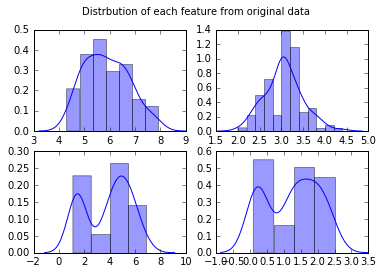

In [57]:
# Plot distribution of each feature before StandardScaler
fig, ax = plt.subplots(2,2)
sns.distplot(X_train[:,0], ax=ax[0][0])
sns.distplot(X_train[:,1], ax=ax[0][1])
sns.distplot(X_train[:,2], ax=ax[1][0])
sns.distplot(X_train[:,3], ax=ax[1][1])
fig.suptitle('Distrbution of each feature from original data')

______________________________________________________________________________________________________________________
Perform the standard scaling and plot the distribution of scaled data.

In [9]:
# Initiate StandardScaler
scaler = preprocessing.StandardScaler().fit(X_train)

# Create StandardScaler dataset
X_train_standard = scaler.transform(X_train)
X_test_standard = scaler.transform(X_test)

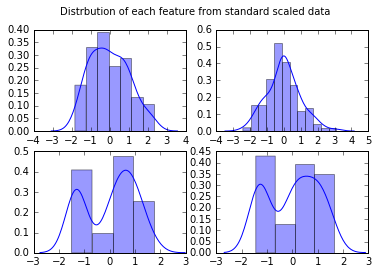

In [58]:
# Plot distribution of each feature after StandardScaler
fig, ax = plt.subplots(2,2)
sns.distplot(X_train_standard[:,0], ax=ax[0][0])
sns.distplot(X_train_standard[:,1], ax=ax[0][1])
sns.distplot(X_train_standard[:,2], ax=ax[1][0])
sns.distplot(X_train_standard[:,3], ax=ax[1][1])
fig.suptitle('Distrbution of each feature from standard scaled data')

<a id='b'></a>
______________________________________________________________________________________________________________________
Perform the min max scaling and plot the distribution of scaled data.

In [45]:
# Initiate MinMaxScaler
min_max_scaler = preprocessing.MinMaxScaler().fit(X_train)

# Create MinMaxScaler dataset
X_train_minmax = min_max_scaler.transform(X_train)
X_test_minmax = min_max_scaler.transform(X_test)

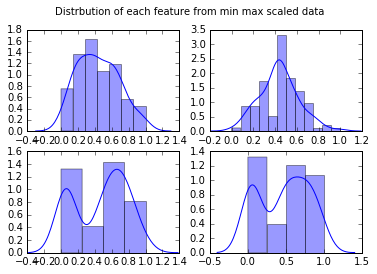

In [59]:
# Plot distribution of each feature after MinMaxScaler
fig, ax = plt.subplots(2,2)
sns.distplot(X_train_minmax[:,0], ax=ax[0][0])
sns.distplot(X_train_minmax[:,1], ax=ax[0][1])
sns.distplot(X_train_minmax[:,2], ax=ax[1][0])
sns.distplot(X_train_minmax[:,3], ax=ax[1][1])
fig.suptitle('Distrbution of each feature from min max scaled data')

<a id='c'></a>
______________________________________________________________________________________________________________________
Perform the absolute min max scaling and plot the distribution of scaled data.

In [46]:
# Initiate MaxAbsScaler
max_abs_scaler = preprocessing.MaxAbsScaler().fit(X_train)

# Create MinMaxScaler dataset
X_train_maxabs = max_abs_scaler.transform(X_train)
X_test_maxabs = max_abs_scaler.transform(X_test)

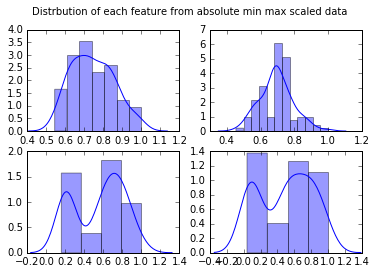

In [60]:
# Plot distribution after MinAbsScaler
fig, ax = plt.subplots(2,2)
sns.distplot(X_train_maxabs[:,0], ax=ax[0][0])
sns.distplot(X_train_maxabs[:,1], ax=ax[0][1])
sns.distplot(X_train_maxabs[:,2], ax=ax[1][0])
sns.distplot(X_train_maxabs[:,3], ax=ax[1][1])
fig.suptitle('Distrbution of each feature from absolute min max scaled data')

<a id='d'></a>
______________________________________________________________________________________________________________________
Perform the robust scaling and plot the distribution of scaled data.

In [50]:
# Initiate RobustScaler
robust_scaler = preprocessing.RobustScaler().fit(X_train)

# Create Robust dataset
X_train_robust = robust_scaler.transform(X_train)
X_test_robust = robust_scaler.transform(X_test)

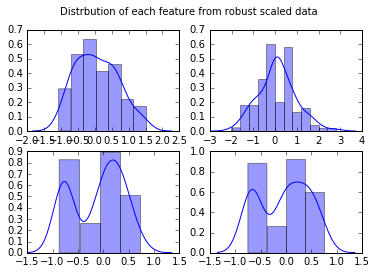

In [61]:
# Plot distribution after RobustScaler
fig, ax = plt.subplots(2,2)
sns.distplot(X_train_robust[:,0], ax=ax[0][0])
sns.distplot(X_train_robust[:,1], ax=ax[0][1])
sns.distplot(X_train_robust[:,2], ax=ax[1][0])
sns.distplot(X_train_robust[:,3], ax=ax[1][1])
fig.suptitle('Distrbution of each feature from robust scaled data')

<a id='quantile'></a>
______________________________________________________________________________________________________________________
Perform the quantile transformation and plot the distribution of transformed data.

In [52]:
# Initiate QuantileTransformer (only availbe in scikit-learn 0.19)
quantile_transformer = preprocessing.QuantileTransformer(random_state=0).fit(X_train)

# Create QuantileTransformer dataset
X_train_quantile = quantile_transformer.transform(X_train)
X_test_quantile = quantile_transformer.transform(X_test)

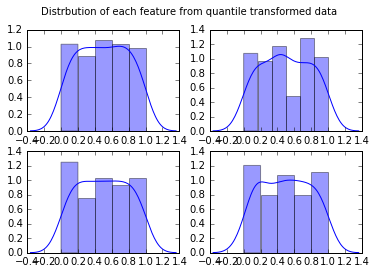

In [62]:
# Plot distribution after QuantileTransformer
fig, ax = plt.subplots(2,2)
sns.distplot(X_train_quantile[:,0], ax=ax[0][0])
sns.distplot(X_train_quantile[:,1], ax=ax[0][1])
sns.distplot(X_train_quantile[:,2], ax=ax[1][0])
sns.distplot(X_train_quantile[:,3], ax=ax[1][1])
fig.suptitle('Distrbution of each feature from quantile transformed data')

<a id='imputation'></a>
______________________________________________________________________________________________________________________
Load data from Uber data warehouse and perform transformations.

In [64]:
# Load dataset from querybuilder
from queryrunner_client import Client
qr = Client(user_email='allenz@uber.com')
cursor = qr.execute_qb(builder_id='H4VLw33GAj')
query_output = cursor.fetchall()

12/12/2017 08:40:45 AM  Fetching metadata for Builder H4VLw33GAj 
12/12/2017 08:40:45 AM  Loaded object metadata. 
12/12/2017 08:40:45 AM  Templating query for Builder H4VLw33GAj 
12/12/2017 08:40:45 AM  Templated query successfully. 
12/12/2017 08:40:45 AM  Created execution 7a58a4d4-f5f5-48b5-b28f-a0bac8ff851a 
12/12/2017 08:40:51 AM  Query finished. 


Reshape the list to make it compatible with Imputer module.

In [66]:
# Convert list to array
lt_trips = [i['lifetime_trips'] for i in query_output]
lt_trips_array = np.asarray(lt_trips).reshape(-1,1)

In [67]:
# Examine missing values
None in lt_trips

True

In [69]:
# Imputation of missing values
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
imp.fit(lt_trips_array)
lt_trips_array_imput = imp.transform(lt_trips_array)

In [70]:
# Examine missing values
None in lt_trips_array_imput.tolist()

False

<a id='log'></a>
______________________________________________________________________________________________________________________
Plot distribution of lifetime trips before log transformation.

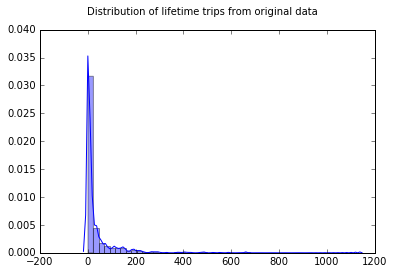

In [74]:
# Plot distribution before log transformation
sns.distplot(lt_trips_array_imput)
plt.suptitle('Distribution of lifetime trips from original data')

In [76]:
# Log transformation
log_transformer = FunctionTransformer(np.log1p)
lt_trips_array_imput_log = log_transformer.transform(lt_trips_array_imput)

Perform the log transformation and plot the distribution again.

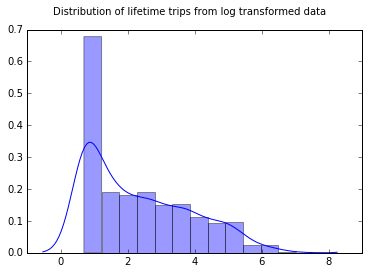

In [77]:
# Plot distribution after log transformation
sns.distplot(lt_trips_array_imput_log)
plt.suptitle('Distribution of lifetime trips from log transformed data')

<a id='encoding'></a>
______________________________________________________________________________________________________________________
Load categorical data from Uber data warehouse and perform encoding.

In [78]:
# Load dataset from querybuilder
from queryrunner_client import Client
qr = Client(user_email='allenz@uber.com')
cursor = qr.execute_qb(builder_id='gW1fv21q7r')
query_categorical = cursor.fetchall()

12/12/2017 08:56:09 AM  Fetching metadata for Builder gW1fv21q7r 
12/12/2017 08:56:09 AM  Loaded object metadata. 
12/12/2017 08:56:09 AM  Templating query for Builder gW1fv21q7r 
12/12/2017 08:56:09 AM  Templated query successfully. 
12/12/2017 08:56:10 AM  Created execution bf0c1562-18d1-4c31-a5c1-aaf28818a27d 
12/12/2017 08:56:15 AM  Query finished. 


Print categorical data before encoding

In [79]:
# Data before encoding
query_categorical[0]

{'lifetime_trips': 4, 'mega_region': 'APACX'}

In [80]:
# Convert categorical features into numerical features
vec = DictVectorizer()
query_categorical_encode = vec.fit_transform(query_categorical).toarray()

Print encoded categorical data.

In [81]:
# Data after encoding
query_categorical_encode[0]

array([ 4.,  1.,  0.,  0.,  0.,  0.,  0.])

Print feature names after encoding.

In [83]:
# Print encoded features
vec.get_feature_names()

['lifetime_trips',
 'mega_region=APACX',
 'mega_region=China',
 'mega_region=EMEA',
 'mega_region=India SC',
 'mega_region=LatAm',
 'mega_region=US & Canada']

______________________________________________________________________________________________________________________
## <font color='black'>Next Step</font>
To integrate this module with in-house ML platform Michelangelo's Python client or external auto ML library Auto-sklearn.
______________________________________________________________________________________________________________________
## <font color='black'>Reference</font>
1. [Scikit-Learn Data Preprocessing Moduel Documentation](http://scikit-learn.org/stable/modules/preprocessing.html)
<br/>
2. [AutoML](http://www.ml4aad.org/automl/)